In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Quoc Trung Ho <hoquoctrung98@gmail.com>
"""

import sys
import traceback

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append("../")  # add the qball package to the python path
# sys.path.append(os.path.realpath('..'))

from bubble_gw import many_bubbles

In [2]:
%matplotlib ipympl
sns.set(style="ticks", font="Dejavu Sans")
sns.set_palette("bright")
# set default font for both text and mathtext
mpl.rcParams["mathtext.default"] = "regular"
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"
# mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update(
    {
        "axes.linewidth": 1,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{bm} \usepackage{xcolor}",
        # Enforce default LaTeX font.
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "font.weight": "bold",
        "figure.facecolor": "white",
        "animation.html": "jshtml",
    }
)

# do not show figures on screen
plt.ioff()

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")

In [3]:
L = 10.0
# An empty lattice is merely a container with no bubbles validation
lattice_empty = many_bubbles.Lattice.Empty()
# A cartesian lattice
lattice_cartesian = many_bubbles.Lattice.Cartesian(
    origin=[0.0, 0.0, 0.0], basis=[[L, 0.0, 0.0], [0.0, L, 0.0], [0.0, 0.0, L]]
)
# A spherical lattice
lattice_spherical = many_bubbles.Lattice.Spherical(center=[0.0, 0.0, 0.0], radius=10)

In [4]:
# The input bubbles_interior and bubbles_exterior is a numpy array of shape (n_bubbles, 4)
bubbles_interior = np.array([[0.0, 0.0, 0.0, L], [1.0, L, 0.0, 0.0]])
bubbles_exterior = np.array([[0.0, 0.0, 0.0, 2 * L], [1.0, 3 * L, 0.0, 0.0]])

# Below we create a combination of bubbles on a lattice
lattice_bubbles_empty = many_bubbles.LatticeBubbles(
    bubbles_interior=bubbles_interior,
    bubbles_exterior=bubbles_exterior,
    lattice=lattice_empty,
)

# Note that is is optional to pass bubbles_exterior as an input argument
# we can always generate the bubbles_exterior with a built-in boundary conditions later
lattice_bubbles_cartesian = many_bubbles.LatticeBubbles(
    bubbles_interior=bubbles_interior,
    bubbles_exterior=None,
    lattice=lattice_cartesian,
)
lattice_bubbles_spherical = many_bubbles.LatticeBubbles(
    bubbles_interior=bubbles_interior,
    bubbles_exterior=None,
    lattice=lattice_spherical,
)

# Here are examples of setting bubbles_exterior with a boundary condition
lattice_bubbles_cartesian.with_boundary_condition(boundary_condition="periodic")
lattice_bubbles_spherical.with_boundary_condition(boundary_condition="reflection")

In [5]:
# Here we perform bubble validation on the lattice, if not satisfied an error is thrown
# + bubbles_interior must be inside the lattice
# + bubbles_exterior must be outside the lattice
# + causality is imposed by all lattice to ensure no bubble is formed inside other bubbles.
# Note that the causality checks only applied for (Interior-Interior) and (Interior-Exterior), and not (Exterior-Exterior), as some boundary conditions might violate this

try:
    bubbles_interior = np.array([[0.0, 0.0, 0.0, L], [1.0, L * 1.0001, 0.0, 0.0]])
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=None,
        lattice=lattice_cartesian,
    )
except Exception:
    print(traceback.format_exc())

try:
    bubbles_interior = np.array([[0.0, 0.0, 0.0, L], [1.0, L, 0.0, 0.0]])
    bubbles_exterior = np.array([[0.0, 0.0, 0.0, 0.5 * L], [1.0, 0.5 * L, 0.0, 0.0]])
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=bubbles_exterior,
        lattice=lattice_spherical,
    )
except Exception:
    print(traceback.format_exc())

try:
    bubbles_interior = np.array([[0.0, 0.0, 0.0, L], [2 * L, 0.0, 0.0, 0.0]])
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=None,
        lattice=lattice_empty,
    )
except Exception:
    print(traceback.format_exc())

Traceback (most recent call last):
  File "/tmp/ipykernel_1256163/2855022501.py", line 9, in <module>
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=None,
        lattice=lattice_cartesian,
    )
ValueError: Interior bubbles formed outside lattice: [Interior(1)]

Traceback (most recent call last):
  File "/tmp/ipykernel_1256163/2855022501.py", line 20, in <module>
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=bubbles_exterior,
        lattice=lattice_spherical,
    )
ValueError: Exterior bubbles formed inside lattice: [Exterior(0), Exterior(1)]

Traceback (most recent call last):
  File "/tmp/ipykernel_1256163/2855022501.py", line 30, in <module>
    lattice_bubbles = many_bubbles.LatticeBubbles(
        bubbles_interior=bubbles_interior,
        bubbles_exterior=None,
        lattice=lattice_empty,
    )
ValueError: Bubble Interior(0) is form

## Transforming the LatticeBubbles system with an Isometry3

Isometry3 is composed of a spatial translation + a spatial rotation (which is specified by either euler_angles or rotation_matrix, but not both).

Under Isometry3, both the lattice and the (bubbles_interior + bubbles_exterior) are transformed, in such a way that the relative positions of the system remains the same.

In [6]:
bubbles_interior = np.array(
    [[0.0, 10.0, 0.0, 1.0], [1.0, 0.0, 10.0, 0.0], [2.0, 0.0, 0.0, 10.0]]
)
lattice_bubbles_cartesian = many_bubbles.LatticeBubbles(
    bubbles_interior=bubbles_interior,
    bubbles_exterior=None,
    lattice=lattice_cartesian,
)
lattice_bubbles_cartesian.with_boundary_condition(boundary_condition="periodic")
print(lattice_bubbles_cartesian.bubbles_interior)
print(lattice_bubbles_cartesian.bubbles_exterior)

[[ 0. 10.  0.  1.]
 [ 1.  0. 10.  0.]
 [ 2.  0.  0. 10.]]
[[  0.  20.   0.   1.]
 [  0.   0.   0.   1.]
 [  0.  10.  10.   1.]
 [  0.  10. -10.   1.]
 [  0.  10.   0.  11.]
 [  0.  10.   0.  -9.]
 [  1.  10.  10.   0.]
 [  1. -10.  10.   0.]
 [  1.   0.  20.   0.]
 [  1.   0.   0.   0.]
 [  1.   0.  10.  10.]
 [  1.   0.  10. -10.]
 [  2.  10.   0.  10.]
 [  2. -10.   0.  10.]
 [  2.   0.  10.  10.]
 [  2.   0. -10.  10.]
 [  2.   0.   0.  20.]
 [  2.   0.   0.   0.]]


In [7]:
# Create an Isometry3 transformation and apply it to LatticeBubbles, which transform both the lattice and the bubbles
iso = many_bubbles.Isometry3(
    translation=[1.0, 2.0, 3.0], euler_angles=None, rotation_matrix=None
)
# One can either call method `transform` to create a copy of the LatticeBubbles after transformation,
# or call method `transform_mut` to perform the in-place transformation on the object
transformed_lattice_bubbles_cartesian = lattice_bubbles_cartesian.transform(iso)
print(transformed_lattice_bubbles_cartesian.bubbles_interior)
print(transformed_lattice_bubbles_cartesian.bubbles_exterior)

[[ 0. 11.  2.  4.]
 [ 1.  1. 12.  3.]
 [ 2.  1.  2. 13.]]
[[ 0. 21.  2.  4.]
 [ 0.  1.  2.  4.]
 [ 0. 11. 12.  4.]
 [ 0. 11. -8.  4.]
 [ 0. 11.  2. 14.]
 [ 0. 11.  2. -6.]
 [ 1. 11. 12.  3.]
 [ 1. -9. 12.  3.]
 [ 1.  1. 22.  3.]
 [ 1.  1.  2.  3.]
 [ 1.  1. 12. 13.]
 [ 1.  1. 12. -7.]
 [ 2. 11.  2. 13.]
 [ 2. -9.  2. 13.]
 [ 2.  1. 12. 13.]
 [ 2.  1. -8. 13.]
 [ 2.  1.  2. 23.]
 [ 2.  1.  2.  3.]]


In [8]:
euler_angles_six_faces = [
    [0.0, 0.0, 0.0],  # +z direction
    [np.pi, 0.0, 0.0],  # -z direction
    [0.0, np.pi / 2, 0.0],  # +x direction
    [0.0, -np.pi / 2, 0.0],  # -x direction
    [-np.pi / 2, 0.0, 0.0],  # +y direction
    [np.pi / 2, 0.0, 0.0],  # -y direction
]
for euler_angles in euler_angles_six_faces:
    iso = many_bubbles.Isometry3(euler_angles=euler_angles, rotation_matrix=None)
    transformed_lattice_bubbles_cartesian = lattice_bubbles_cartesian.transform(iso)
    print(transformed_lattice_bubbles_cartesian.bubbles_interior)

[[ 0. 10.  0.  1.]
 [ 1.  0. 10.  0.]
 [ 2.  0.  0. 10.]]
[[ 0.0000000e+00  1.0000000e+01 -1.2246468e-16 -1.0000000e+00]
 [ 1.0000000e+00  0.0000000e+00 -1.0000000e+01  1.2246468e-15]
 [ 2.0000000e+00  0.0000000e+00 -1.2246468e-15 -1.0000000e+01]]
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.00000000e+01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+01  0.00000000e+00]
 [ 2.00000000e+00  1.00000000e+01  0.00000000e+00  1.77635684e-15]]
[[ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  1.00000000e+01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+01  0.00000000e+00]
 [ 2.00000000e+00 -1.00000000e+01  0.00000000e+00  1.77635684e-15]]
[[ 0.00000000e+00  1.00000000e+01  1.00000000e+00  2.22044605e-16]
 [ 1.00000000e+00  0.00000000e+00  1.77635684e-15 -1.00000000e+01]
 [ 2.00000000e+00  0.00000000e+00  1.00000000e+01  1.77635684e-15]]
[[ 0.00000000e+00  1.00000000e+01 -1.00000000e+00  2.22044605e-16]
 [ 1.00000000e+00  0.00000000e+00  1.77635684e-15  1.00000000e+01]
 [ 2.0000000

In [9]:
import matplotlib.pyplot as plt
import numpy as np


class LatticeBubblesVisualizer:
    """
    A visualizer for LatticeBubbles objects, providing methods to plot
    bubble centers and actual bubble spheres with time-dependent radii.
    """

    def __init__(self, lattice_bubbles):
        """
        Parameters
        ----------
        lattice_bubbles : many_bubbles.LatticeBubbles
            Object with attributes:
            - bubbles_interior : np.ndarray, shape (n_int, 4) [t_bubble, x, y, z]
            - bubbles_exterior : np.ndarray, shape (n_ext, 4) [t_bubble, x, y, z]
        """
        if not hasattr(lattice_bubbles, "bubbles_interior") or not hasattr(
            lattice_bubbles, "bubbles_exterior"
        ):
            raise ValueError(
                "lattice_bubbles must have .bubbles_interior and .bubbles_exterior attributes"
            )

        self.interior = np.asarray(lattice_bubbles.bubbles_interior)
        self.exterior = np.asarray(lattice_bubbles.bubbles_exterior)

        if self.interior.shape[1] != 4 or (
            self.exterior.size > 0 and self.exterior.shape[1] != 4
        ):
            raise ValueError(
                "Both bubble arrays must have shape (n, 4) with columns [t_bubble, x, y, z]"
            )

        self.lattice_bubbles = lattice_bubbles

    def plot_bubbles_centers(
        self,
        fig,
        ax,
        tmax=None,
        show_bubbles_exterior=False,
        marker_size=20,
        alpha=1.0,
        cmap="viridis",
        color_by_time=True,
        equal_aspect=True,
        title=None,
        show_labels=False,
        label_fontsize=8,
        label_color="black",
        **kwargs_scatter,
    ):
        """
        Plot only the centers of bubbles (as points), similar to the original plot_bubbles_3d.

        Parameters
        ----------
        Same as previous plot_bubbles_3d function.

        Returns
        -------
        list of PathCollection
            Scatter artists for each group (interior/exterior).
        """
        to_plot = [("I", self.interior)]
        if show_bubbles_exterior and self.exterior.shape[0] > 0:
            to_plot.append(("E", self.exterior))

        all_x, all_y, all_z, all_t = [], [], [], []
        scatters = []

        scatter_kwargs = kwargs_scatter.copy()
        if "s" not in scatter_kwargs:
            scatter_kwargs["s"] = marker_size
        if "alpha" not in scatter_kwargs:
            scatter_kwargs["alpha"] = alpha
        if "depthshade" not in scatter_kwargs:
            scatter_kwargs["depthshade"] = True

        for prefix, bubbles in to_plot:
            if bubbles.shape[0] == 0:
                continue

            if tmax is not None:
                mask = bubbles[:, 0] < tmax
            else:
                mask = np.ones(bubbles.shape[0], dtype=bool)

            filtered = bubbles[mask]
            if filtered.shape[0] == 0:
                continue

            t = filtered[:, 0]
            x = filtered[:, 1]
            y = filtered[:, 2]
            z = filtered[:, 3]

            all_x.extend(x)
            all_y.extend(y)
            all_z.extend(z)
            all_t.extend(t)

            if color_by_time:
                if "c" in scatter_kwargs:
                    sc = ax.scatter(x, y, z, **scatter_kwargs)
                else:
                    sc = ax.scatter(x, y, z, c=t, cmap=cmap, **scatter_kwargs)
            else:
                group_color = "tab:blue" if prefix == "I" else "tab:orange"
                current_kwargs = scatter_kwargs.copy()
                if "c" not in current_kwargs:
                    current_kwargs["c"] = group_color
                sc = ax.scatter(x, y, z, label=f"{prefix} bubbles", **current_kwargs)

            scatters.append(sc)

            if show_labels:
                start_idx = 0 if prefix == "I" else self.interior.shape[0]
                local_indices = np.nonzero(mask)[0]
                for loc_idx, (xi, yi, zi) in zip(local_indices, zip(x, y, z)):
                    global_idx = start_idx + loc_idx
                    ax.text(
                        xi,
                        yi,
                        zi,
                        f"{prefix}({global_idx})",
                        fontsize=label_fontsize,
                        color=label_color,
                        ha="center",
                        va="center",
                    )

        if len(scatters) == 0:
            print("No bubble centers to plot with current filters.")
            if title is None:
                title = "Bubble centers (none found)"
            ax.set_title(title)
            return []

        # Colorbar only if coloring by nucleation time and no user-provided color
        if color_by_time and "c" not in kwargs_scatter:
            cbar = fig.colorbar(scatters[-1], ax=ax, shrink=0.6, aspect=20)
            cbar.set_label("Nucleation time $t_b$")

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if title is None:
            n_int = (
                len(self.interior)
                if tmax is None
                else (self.interior[:, 0] < tmax).sum()
            )
            n_ext = (
                len(self.exterior)
                if tmax is None and show_bubbles_exterior
                else (
                    (self.exterior[:, 0] < tmax).sum()
                    if show_bubbles_exterior and self.exterior.shape[0] > 0
                    else 0
                )
            )
            total = n_int + n_ext
            if tmax is not None:
                title = f"Bubble centers with $t_b < {tmax:.2f}$ ({total} points)"
            else:
                title = f"All bubble centers ({total} points)"
            if not show_bubbles_exterior:
                title += " (interior only)"
        ax.set_title(title)

        if equal_aspect and all_x:
            coords = np.array([all_x, all_y, all_z])
            max_range = (coords.max(1) - coords.min(1)).max() / 2.0
            mids = coords.mean(1)
            ax.set_xlim(mids[0] - max_range, mids[0] + max_range)
            ax.set_ylim(mids[1] - max_range, mids[1] + max_range)
            ax.set_zlim(mids[2] - max_range, mids[2] + max_range)

        if len(scatters) > 1:
            ax.legend()

        return scatters

    def plot_bubbles(
        self,
        fig,
        ax,
        t,
        show_bubbles_exterior=False,
        alpha=0.3,
        interior_color="tab:blue",
        exterior_color="tab:orange",
        equal_aspect=True,
        title=None,
        show_labels=False,
        label_fontsize=8,
        label_color="black",
    ):
        """
        Draw actual 3D spheres for bubbles that have nucleated by time t,
        with radius = t - t_bubble (only for t > t_bubble).

        Parameters
        ----------
        fig : matplotlib.figure.Figure
        ax : matplotlib.axes.Axes (3D)
        t : float
            Current time at which to visualize the bubbles.
        show_bubbles_exterior : bool
            Whether to draw exterior bubbles.
        alpha : float
            Transparency of the spheres.
        interior_color / exterior_color : str or color
            Colors for interior and exterior bubbles.
        equal_aspect, title, show_labels, etc. : same as before.

        Returns
        -------
        list of Poly3DCollection
            Artists for the drawn spheres.
        """
        to_plot = [("I", self.interior, interior_color)]
        if show_bubbles_exterior and self.exterior.shape[0] > 0:
            to_plot.append(("E", self.exterior, exterior_color))

        artists = []
        all_coords = []

        for prefix, bubbles, color in to_plot:
            if bubbles.shape[0] == 0:
                continue

            # Only bubbles that have nucleated: t_b <= t
            mask = bubbles[:, 0] <= t
            active = bubbles[mask]

            if active.shape[0] == 0:
                continue

            t_b = active[:, 0]
            centers = active[:, 1:4]
            radii = t - t_b  # radius grows linearly with time after nucleation

            # Draw each sphere
            for center, radius in zip(centers, radii):
                if radius <= 0:
                    continue  # safety

                # Create sphere
                u = np.linspace(0, 2 * np.pi, 20)
                v = np.linspace(0, np.pi, 20)
                x = radius * np.outer(np.cos(u), np.sin(v)) + center[0]
                y = radius * np.outer(np.sin(u), np.sin(v)) + center[1]
                z = radius * np.outer(np.ones_like(u), np.cos(v)) + center[2]

                # Plot surface
                surf = ax.plot_surface(
                    x,
                    y,
                    z,
                    color=color,
                    alpha=alpha,
                    linewidth=0,
                    antialiased=True,
                    shade=True,
                )
                artists.append(surf)

                all_coords.append(center)

            # Optional labels
            if show_labels:
                start_idx = 0 if prefix == "I" else self.interior.shape[0]
                orig_indices = np.nonzero(mask)[0]
                for orig_idx, center in zip(orig_indices, centers):
                    global_idx = start_idx + orig_idx
                    ax.text(
                        center[0],
                        center[1],
                        center[2],
                        f"{prefix}({global_idx})",
                        fontsize=label_fontsize,
                        color=label_color,
                        ha="center",
                        va="center",
                    )

        if len(artists) == 0:
            print(f"No bubbles visible at t = {t}")
            if title is None:
                title = f"Bubbles at t = {t:.2f} (none visible)"
            ax.set_title(title)
            return []

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if title is None:
            n_int = (self.interior[:, 0] <= t).sum()
            n_ext = (self.exterior[:, 0] <= t).sum() if show_bubbles_exterior else 0
            total = n_int + n_ext
            title = f"Bubbles at t = {t:.2f} ({total} growing)"
            if not show_bubbles_exterior:
                title += " (interior only)"
        ax.set_title(title)

        if equal_aspect and all_coords:
            all_coords = np.array(all_coords)
            centers = all_coords
            max_radius = max(t - self.interior[self.interior[:, 0] <= t, 0].max(), 0)
            if show_bubbles_exterior:
                max_radius = max(
                    max_radius, t - self.exterior[self.exterior[:, 0] <= t, 0].max(), 0
                )

            overall_min = centers.min(axis=0) - max_radius
            overall_max = centers.max(axis=0) + max_radius
            max_range = (overall_max - overall_min).max() / 2.0
            mid = (overall_max + overall_min) / 2.0

            ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
            ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
            ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

        if len(to_plot) > 1:
            # Simple legend via proxy artists
            from matplotlib.lines import Line2D

            legend_elements = [
                Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    label="Interior bubbles",
                    markerfacecolor=interior_color,
                    markersize=10,
                ),
                Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    label="Exterior bubbles",
                    markerfacecolor=exterior_color,
                    markersize=10,
                ),
            ]
            ax.legend(handles=legend_elements)

        return artists

In [10]:
L = 2.0
bubbles_interior = np.loadtxt("./inputs/confY.txt")
bubbles_interior = bubbles_interior[:10]

lattice_bubbles = many_bubbles.LatticeBubbles(
    bubbles_interior=bubbles_interior,
    lattice=many_bubbles.Lattice.Cartesian(
        origin=[0.0, 0.0, 0.0], basis=[[L, 0.0, 0.0], [0.0, L, 0.0], [0.0, 0.0, L]]
    ),
    sort_by_time=False,
)
lattice_bubbles.with_boundary_condition("periodic")

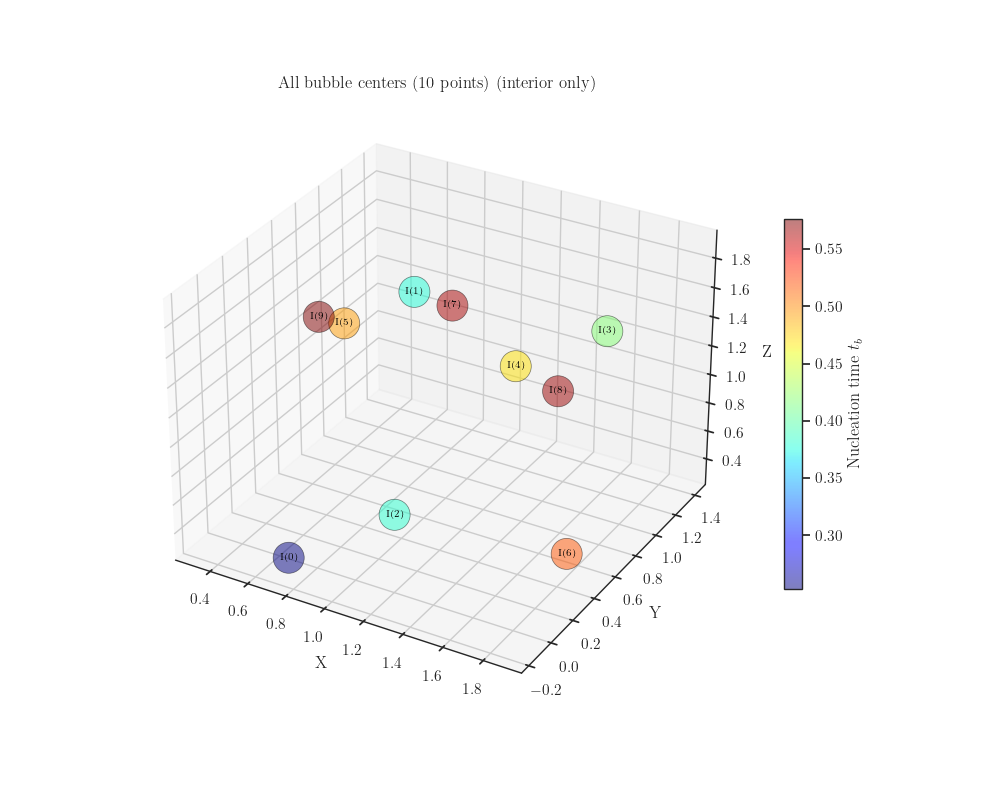

In [17]:
# Assuming you have a lattice_bubbles object
visualizer = LatticeBubblesVisualizer(lattice_bubbles)

# Plot centers
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
visualizer.plot_bubbles_centers(
    fig,
    ax,
    alpha=0.5,
    cmap="jet",
    s=500,
    show_bubbles_exterior=False,
    color_by_time=True,
    show_labels=True,
    label_fontsize=7,
    marker="o",
    edgecolor="black",
    linewidths=0.5,
)
fig.savefig(
    f"./figures/many_bubbles/many_bubbles_centers.png",
    bbox_inches="tight",
    facecolor="white",
)
fig.show()

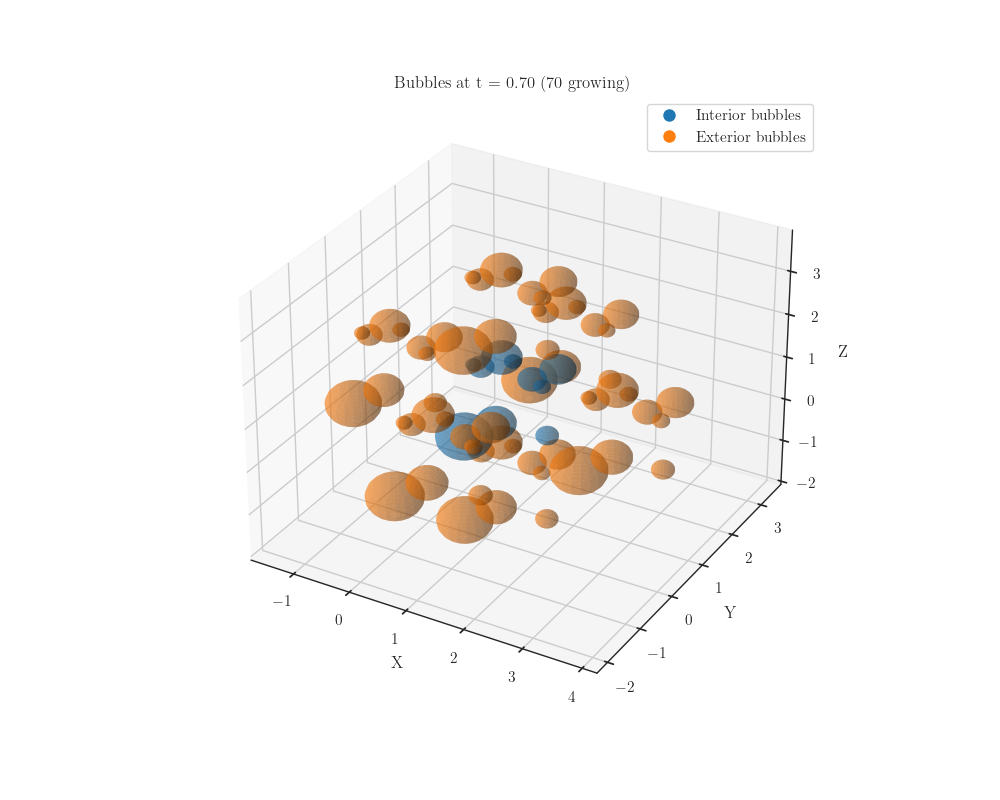

In [18]:
# Plot actual growing bubbles at a given time
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
visualizer.plot_bubbles(fig, ax, t=0.7, show_bubbles_exterior=True, alpha=0.4)
fig.savefig(
    f"./figures/many_bubbles/many_bubbles_at_time.png",
    bbox_inches="tight",
    facecolor="white",
)
fig.show()